In [1]:
### Final Project Assignment

In [2]:
#importing libraries
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
import scipy.stats
pd.options

In [3]:
##Step 1: Choose an ETF with a minimum of 100 assets, identify those assets
#SPDR S&P 500 ETF Trust (SPY)
query_string = 'https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx'
SPY_holdings = pd.read_excel(query_string, header = 4)

In [4]:
#Removing NA values to obtain all the tickers we want
SPY_holdings = SPY_holdings.dropna()

In [5]:
#The list of holdings
SPY_holdings

,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,Apple Inc.,AAPL,03783310,2046251,6.192656,Information Technology,167137580.0,USD
1,Microsoft Corporation,MSFT,59491810,2588173,5.607671,Information Technology,83319080.0,USD
2,Amazon.com Inc.,AMZN,02313510,2000019,2.357983,Consumer Discretionary,99201310.0,USD
3,Berkshire Hathaway Inc. Class B,BRK.B,08467070,2073390,1.691193,Financials,20137948.0,USD
4,Alphabet Inc. Class A,GOOGL,02079K30,BYVY8G0,1.652656,Communication Services,66760636.0,USD
...,...,...,...,...,...,...,...,...
500,DaVita Inc.,DVA,23918K10,2898087,0.012549,Health Care,620367.0,USD
501,DISH Network Corporation Class A,DISH,25470M10,2303581,0.010681,Communication Services,2751117.0,USD
502,Vornado Realty Trust,VNO,92904210,2933632,0.010408,Real Estate,1744951.0,USD
503,News Corporation Class B,NWS,65249B20,BBGVT51,0.006749,Communication Services,1362224.0,USD


In [6]:
#As we are interested in the assets, we want to place them into a list
SPY_tickers = SPY_holdings.Ticker.to_list()

In [7]:
#All the assets defined in the ETF
SPY_tickers

['AAPL',
 'MSFT',
 'AMZN',
 'BRK.B',
 'GOOGL',
 'UNH',
 'GOOG',
 'JNJ',
 'XOM',
 'NVDA',
 'TSLA',
 'JPM',
 'PG',
 'V',
 'HD',
 'CVX',
 'MA',
 'PFE',
 'ABBV',
 'LLY',
 'MRK',
 'META',
 'PEP',
 'KO',
 'BAC',
 'AVGO',
 'TMO',
 'COST',
 'WMT',
 'MCD',
 'CSCO',
 'ABT',
 'DHR',
 'NEE',
 'LIN',
 'ACN',
 'WFC',
 'DIS',
 'PM',
 'VZ',
 'BMY',
 'ADBE',
 'TXN',
 'CMCSA',
 'RTX',
 'AMGN',
 'HON',
 'COP',
 'UPS',
 'NKE',
 'CRM',
 'NFLX',
 'T',
 'UNP',
 'LOW',
 'QCOM',
 'IBM',
 'CVS',
 'ORCL',
 'CAT',
 'ELV',
 'SCHW',
 'DE',
 'GS',
 'SBUX',
 'MS',
 'LMT',
 'SPGI',
 'INTC',
 'GILD',
 'INTU',
 'BLK',
 'BA',
 'AMD',
 'PLD',
 'MDT',
 'ADP',
 'CI',
 'AMT',
 'ISRG',
 'TJX',
 'MDLZ',
 'AMAT',
 'CB',
 'AXP',
 'ADI',
 'C',
 'GE',
 'TMUS',
 'MO',
 'MMC',
 'SYK',
 'PYPL',
 'DUK',
 'NOC',
 'REGN',
 'NOW',
 'SO',
 'BKNG',
 'VRTX',
 'PGR',
 'EOG',
 'SLB',
 'BDX',
 'APD',
 'MMM',
 'TGT',
 'ZTS',
 'BSX',
 'CSX',
 'CL',
 'HUM',
 'FISV',
 'MRNA',
 'AON',
 'CME',
 'ETN',
 'ITW',
 'EQIX',
 'PNC',
 'LRCX',
 'WM',
 'CCI',

In [8]:
##Step 2: Retrieve historical data for your chosen ETF
SPY_data = yf.download(SPY_tickers, period = '5y')

[*********************100%***********************]  505 of 505 completed

3 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- CASH_USD: No data found, symbol may be delisted


In [9]:
#Drop the columns that have only NA values
#Drop tickers with no data
SPY_tickers.remove('BRK.B')
SPY_tickers.remove('CASH_USD')
SPY_tickers.remove('BF.B')
SPY_data = SPY_data.dropna(how = 'all', axis = 1)


In [10]:
#From this data, we are interested in the returns
SPY_returns = SPY_data['Adj Close'].pct_change()

In [11]:
#Showing the Returns
SPY_returns


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-21,0.001780,0.016757,0.016239,0.003785,0.005133,-0.008001,-0.015798,-0.001578,-0.000558,0.016145,...,-0.002604,-0.002062,0.011826,-0.009826,-0.001032,0.004505,-0.010150,0.001410,0.014390,-0.005914
2017-12-22,-0.002517,-0.003789,0.004195,0.000000,0.003064,-0.005699,0.005298,0.000000,0.002346,-0.002010,...,-0.004510,-0.002893,0.001431,0.004885,-0.002510,-0.001212,0.001417,-0.012954,-0.002526,-0.004012
2017-12-26,-0.001485,0.004944,0.014023,-0.025370,-0.004684,0.008544,-0.010958,0.001230,0.006242,-0.005849,...,0.005186,-0.008705,0.000119,0.006685,-0.001183,-0.002548,-0.001332,-0.003424,-0.009156,0.004862
2017-12-27,0.000744,-0.008515,-0.021479,0.000176,0.003478,-0.006970,0.004643,0.008245,0.002326,0.002157,...,0.009429,0.006952,-0.000952,-0.003471,0.010815,0.002555,0.001500,0.001527,-0.002949,0.001521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14,-0.018077,-0.008172,-0.015239,-0.015536,0.000425,0.001454,-0.000500,-0.002421,0.007012,-0.013205,...,-0.004038,-0.004888,-0.007366,0.012318,-0.002087,0.008221,-0.001479,-0.006723,-0.015327,-0.020585
2022-12-15,-0.025515,-0.031461,0.008946,-0.046854,-0.010676,0.001997,0.000132,-0.024627,0.007129,-0.035444,...,-0.015871,-0.008842,-0.009581,-0.024649,-0.035817,-0.005868,-0.009513,-0.040000,-0.013673,-0.020227
2022-12-16,-0.010341,-0.009281,-0.021434,-0.014579,-0.016064,0.007186,0.002210,-0.014836,0.004609,-0.059192,...,0.012478,-0.009912,-0.007018,-0.023672,-0.006598,-0.008279,-0.011337,-0.008445,-0.017488,-0.028579


In [12]:
#Showing the volume
SPY_data['Volume']

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-20,1363000,5172800,1081700,93902400,3411900,1442000,141600,11948400,1182000,3206200,...,1480100,5021100,10620300,1030600,543100,1157600,1611847,486000,1701200,1806300
2017-12-21,1502200,7125900,1090000,83799600,2249500,1405400,198100,6154700,1203900,4563600,...,1104300,4490300,13578100,869000,650000,1662100,1120228,372100,1607200,1163500
2017-12-22,1221300,2425100,1257600,65397600,2835600,1331700,148600,5449300,869100,1818600,...,748600,3095500,10161400,599600,335900,919900,735523,138300,879900,1345700
2017-12-26,532700,2774000,565100,132742000,2363800,734200,128000,3187900,770100,1514400,...,661100,2496100,4777200,856500,219200,666600,383984,157300,808100,791900
2017-12-27,1038600,2831400,988500,85992800,1927300,734800,236900,5243900,1146600,1690400,...,951600,2048400,7000600,917600,517300,1051900,856239,106100,694600,1159800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-14,1344400,33728900,1311600,82291200,4485400,2024500,1415300,5614900,2016600,2552200,...,1690700,2551600,17597300,2730600,846700,1602600,1506500,393200,1065200,2182000
2022-12-15,1483900,26158300,1063200,98931900,5268300,1848000,831900,4947800,2115800,2870000,...,2513400,3265700,15365100,2186500,1140100,1981600,1694900,410400,1321800,1947400
2022-12-16,2436700,26353200,1603700,160080100,18904100,2909900,1538400,7976100,6450900,6532500,...,2908300,6745300,54594800,4950300,1748300,4262700,2710600,769100,2646600,5216000


In [13]:
##Step 3: Calculate the price momentum factors for each asset in your ETF
#All the factors have a 20 day lag
#Create a Table
table_1 = pd.DataFrame(index = SPY_tickers)

#39 week return , 20 lags
table_1['39w Returns'] = SPY_data['Adj Close'].pct_change(5*39)[-20:].mean()
table_1

,39w Returns
AAPL,-0.120374
MSFT,-0.136989
AMZN,-0.386783
GOOGL,-0.277872
UNH,0.132564
...,...
DVA,-0.349944
DISH,-0.501125
VNO,-0.439391
NWS,-0.145151


In [14]:
#51 week volume price trend
#Create a Table
table_3 = pd.DataFrame(index = SPY_tickers)
table_3['51w Volume Price Trend'] = ((SPY_returns* SPY_data['Volume']).rolling(252).sum()[-20:].mean())
table_3

,51w Volume Price Trend
AAPL,-9.823374e+06
MSFT,-1.060767e+07
AMZN,-5.253472e+07
GOOGL,-1.717249e+07
UNH,4.509835e+05
...,...
DVA,-2.164913e+06
DISH,-4.060823e+06
VNO,-6.705182e+05
NWS,1.439961e+05


In [15]:
#4/52 week price oscillator
#Create a Table
table_4 = pd.DataFrame(index = SPY_tickers)
table_4['4/52w PPO'] = ((SPY_data['Adj Close'].rolling(20).mean() - SPY_data['Adj Close'].rolling(260).mean())/ SPY_data['Adj Close'].rolling(260).std())[-20:].mean()
table_4

,4/52w PPO
AAPL,-0.873248
MSFT,-1.089441
AMZN,-1.592450
GOOGL,-1.402140
UNH,1.037673
...,...
DVA,-1.730034
DISH,-1.100519
VNO,-1.177210
NWS,-0.347275


In [16]:
#Percent above 260 day low
#Create a Table
table_5 = pd.DataFrame(index = SPY_tickers)
table_5['pct_above_low'] = ((SPY_data['Adj Close']- SPY_data['Adj Close'].rolling(252).min())/ SPY_data['Adj Close'].rolling(252).min())[-20:].mean()
table_5

,pct_above_low
AAPL,0.103978
MSFT,0.161405
AMZN,0.058733
GOOGL,0.142886
UNH,0.202654
...,...
DVA,0.121805
DISH,0.168306
VNO,0.126499
NWS,0.216454


In [17]:
##Step 4: Using the price momentum factors, calculate the monthly z-factor score for each asset
#z_score = (x-mu)/sigma
#39 week Returns
z_score_39w_ret =  (table_1['39w Returns'] - table_1['39w Returns'].mean())/ table_1['39w Returns'].std()

#Percent above 260 day low
z_score_perc_low = (table_5['pct_above_low'] - table_5['pct_above_low'].mean())/table_5['pct_above_low'].std()

#4/52 week price oscillator
z_score_ppo = (table_4['4/52w PPO'] - table_4['4/52w PPO'].mean())/ table_4['4/52w PPO'].std()

#51 week volume price trend
z_score_vol_trend = (table_3['51w Volume Price Trend'] - table_3['51w Volume Price Trend'].mean())/table_3['51w Volume Price Trend'].std()

In [18]:
#Aggregating the Z scores
z_score_aggr = z_score_39w_ret+ z_score_perc_low+ z_score_ppo + z_score_vol_trend
z_score_aggr

AAPL     -3.213478
MSFT     -3.293563
AMZN    -10.319926
GOOGL    -5.060211
UNH       1.328127
           ...    
DVA      -3.992035
DISH     -4.071990
VNO      -3.676434
NWS      -1.106033
MBC            NaN
Length: 502, dtype: float64

In [19]:
##Step 5: Identify long and short baskets (10 to 15 assets in each) using calculated z-factors
#We need a list for long assets and we need a list for short baskets
long = z_score_aggr.nlargest(10).index
short = z_score_aggr.nsmallest(10).index
long_tickers = long.to_list()
short_tickers = short.to_list()
print(long_tickers)
print(short_tickers)
      

['OXY', 'FSLR', 'ENPH', 'EQT', 'XOM', 'MPC', 'SLB', 'HES', 'MRO', 'VLO']
['META', 'AMZN', 'CCL', 'LUMN', 'TSLA', 'WBD', 'PYPL', 'INTC', 'GNRC', 'AMD']


In [20]:
#Create dataframe
long_assets, short_assets = pd.DataFrame(), pd.DataFrame()
long_assets = long_assets.append(yf.download(long_tickers, period = '5y'))
short_assets = short_assets.append(yf.download(short_tickers, period = '5y'))


long_returns = long_assets['Adj Close'].pct_change().resample('M').sum()
short_returns = short_assets['Adj Close'].pct_change().resample('M').sum()

print(long_returns)
print(short_returns)

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
                ENPH       EQT      FSLR       HES       MPC       MRO  \
Date                                                                     
2017-12-31 -0.042822  0.049599 -0.016916  0.078287  0.004979  0.038076   
2018-01-31 -0.069514 -0.044210  0.002599  0.065550  0.050354  0.076391   
2018-02-28  0.473911 -0.064531 -0.059600 -0.095203 -0.067957 -0.211072   
2018-03-31  0.337426 -0.052849  0.127263  0.119983  0.135120  0.112453   
2018-04-30 -0.076098  0.062621  0.008545  0.124175  0.030185  0.129309   
...              ...       ...       ...       ...       ...       ...   
2022-08-31  0.014545  0.095352  0.257568  0.078725  0.104735  0.045275   
2022-09-30 -0.019220 -0.144944  0.041993 -0.087748 -0.006840 -0.111703   
2022-10-31  0.116783  0.040628  0.107845  0.267791  0.139180  0.310610   
2022-11-30  0.056774  0.030107  0.179683  0.

In [21]:
#Preparing the Plots
#60 months/5 years back Returns algorithm
#Calculate the returns of long porftolio vs short portfolio
returns_algo = pd.DataFrame(long_returns.mean(axis=1) - short_returns.mean(axis=1)).shift()
Returns = returns_algo[-60:]

#Cumulative returns of portfolio
returns_algo['cumulative_port'] = np.exp(np.log1p(returns_algo).cumsum())

#Returns of benchmark
returns_algo['benchmark'] = yf.download('SPY', period = '5y')['Adj Close'].pct_change().resample('M').sum()

#Cumulative returns of benchmark
returns_algo['cumulative_bench'] = np.exp(np.log1p(returns_algo['benchmark']).cumsum())

#Set up positive values for algorithm to be able to plot red and green values
returns_algo['positive'] = returns_algo[0] > 0

#Cumulative performance of algorithm minus benchmark
returns_algo['cumulative_perf'] = returns_algo['cumulative_port'] - returns_algo['cumulative_bench']
returns_algo['cumulative_pos'] = returns_algo['cumulative_perf'] > 0

#Index date
returns_algo.index = returns_algo.index.date

[*********************100%***********************]  1 of 1 completed


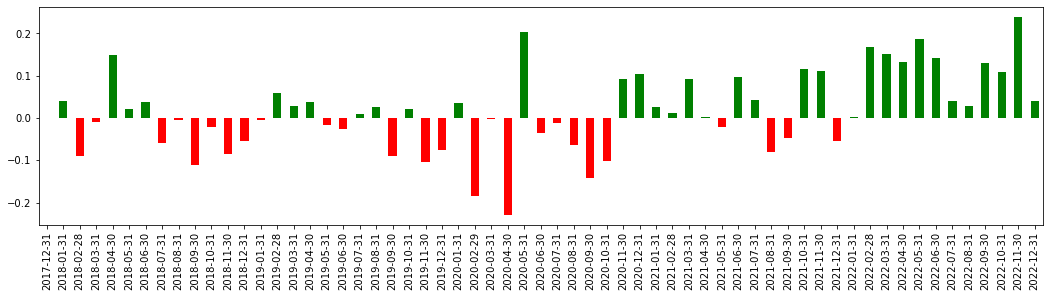

In [22]:
##Step 7: Chart:
##1. Monthly portfolio return bar chart (pos/neg coloring) vs ETF
plot, a1 = plt.subplots(figsize = (18,4))
a1 = returns_algo[0].plot(kind = 'bar', color = returns_algo['positive'].map({True: 'g', False: 'r'}))
plt.show()

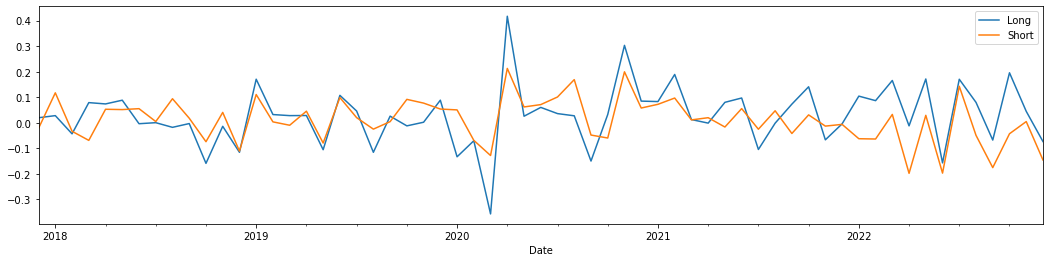

In [23]:
##Step 7: Chart:
## 2. Monthly return for long picks vs short picks vs ETF
#Make a legend to show the different portfolio in the plot
plot2 = plt.subplots(figsize=(18,4))
long_returns.mean(axis=1).plot(label = 'long')
short_returns.mean(axis=1).plot(label = 'short')
plt.legend(['Long', 'Short'])
plt.show()

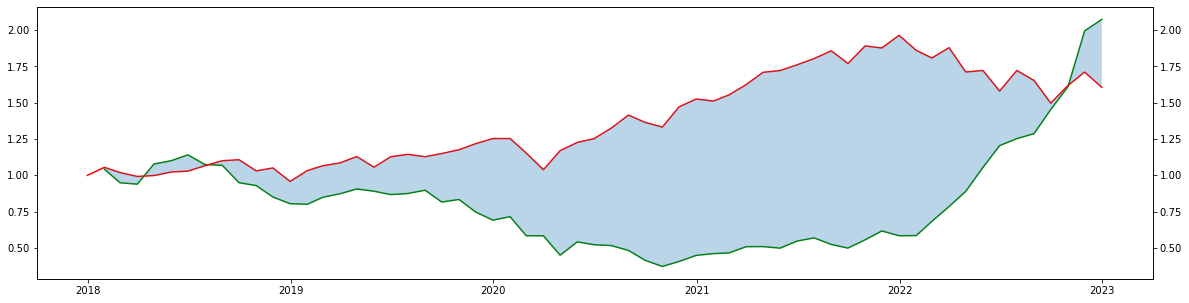

In [24]:
##Step 7: Chart:
##3. Cumulative portfolio return vs ETF
plot, a3 = plt.subplots(figsize = (20, 5))
a1 = a3.twinx()
R = returns_algo.index
a1.fill_between(R, returns_algo['cumulative_port'], returns_algo['cumulative_bench'], alpha = 0.30)
a3.plot(R, returns_algo['cumulative_port'], color= 'green')
a3.plot(R, returns_algo['cumulative_bench'], color= 'red')
plt.show()

In [25]:
##Extra Credit: Calculate the optimized weighting of the monthly restructuring and include in backtesting of
##algorithm. Make sure the weighting is performed each month when the portfolio is restructured.

In [26]:
##Sources
#https://teddykoker.com/2019/05/momentum-strategy-from-stocks-on-the-move-in-python/#:~:text=Momentum%20is%20calculated%20by%20multiplying,points%20of%20the%20portfolio%20value.
#https://medium.com/the-investors-handbook/using-z-score-in-trading-a-python-study-ae90e3fec6ac
#https://plainenglish.io/blog/how-to-calculate-the-ema-of-a-stock-with-python
#https://www.investopedia.com/ask/answers/04/041604.asp